In [23]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [24]:
path = "./OFF0/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [25]:
# Example parameters for BirdNET
#isolation_parameters = {
#    "model" : "birdnet",
#    "output_path" : "outputs",
#    "lat" : 35.4244,
#    "lon" : -120.7463,
#    "week" : 18,
#    "min_conf" : 0.5,
#    "filetype" : "wav", 
#    "num_predictions" : 1,
#    "write_to_csv" : False
#}

# Example Parameters for Microfaune
isolation_parameters = {
     "model" : "microfaune",
     "technique" : "steinberg",
     "threshold_type" : "median",
     "threshold_const" : 2.0,
     "threshold_min" : 0.0,
     "window_size" : 2.0,
     "chunk_size" : 5.0
}

# Example parameters for TweetyNET
#isolation_parameters = {
#     "model" : "tweetynet",
#     "tweety_output": True,
#    "technique" : "steinberg",
#     "threshold_type" : "median",
#     "threshold_const" : 2.0,
#     "threshold_min" : 0.0,
#     "window_size" : 2.0,
#     "chunk_size" : 5.0
#}

### Pandas Ouput of Automated Labeling 

In [26]:
automated_df = generate_automated_labels(path,isolation_parameters)

/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[-1389.773    -2663.6648   -2294.4856   ...    79.470085  -284.25262
   185.12338 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[-148.67583  -75.76819 -243.52382 ...  178.35593  107.10308  217.24103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/IsoAutio.py:852: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotations = annotations.append(new_entry)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[-259.63272 -283.60202 -427.71017 ... -246.49776 -212.0996  -174.01895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/IsoAutio.py:852: FutureWarning: Th

### Function that gathers statistics about the duration of annotations

In [27]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,169,2.05,5.526419,7.709215,1.313401,2.046395,2.811905,4.806871,55.827007


### Function that converts annotations into 3 second chunks

In [28]:
annotation_chunker(automated_df, 3)

,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,20210821_211000.WAV,60.0,0,6.0,3.0,44100,bird
1,20210821_211000.WAV,60.0,0,30.0,3.0,44100,bird
2,20210821_211000.WAV,60.0,0,33.0,3.0,44100,bird
3,20210821_211000.WAV,60.0,0,36.0,3.0,44100,bird
4,20210821_211000.WAV,60.0,0,39.0,3.0,44100,bird
...,...,...,...,...,...,...,...
398,20210816_005000.WAV,60.0,0,45.0,3.0,44100,bird
399,20210816_005000.WAV,60.0,0,48.0,3.0,44100,bird
400,20210816_005000.WAV,60.0,0,51.0,3.0,44100,bird
401,20210816_005000.WAV,60.0,0,54.0,3.0,44100,bird


### Human Manual Labels for Comparison 

In [29]:
manual_df = pd.read_csv("scripps.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df["MANUAL ID"] = "bird"
manual_df["CHANNEL"] = 0
manual_df["FOLDER"] = "./OFF0/"
manual_df

,IN FILE,MANUAL ID,OFFSET,DURATION,max_freq,min_freq,created_at,last_modified,is_marked_for_review,assigned_users,CHANNEL,FOLDER
0,20210810_202000.WAV,bird,49.4567,0.1300,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:04:15 GMT",True,{'admin': 1},0,./OFF0/
1,20210811_080000.WAV,bird,0.3191,4.6492,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 08 Sep 2021 02:52:14 GMT",False,{'admin': 1},0,./OFF0/
2,20210811_181000.WAV,bird,2.3400,0.5900,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:05:04 GMT",True,{'admin': 1},0,./OFF0/
3,20210811_181000.WAV,bird,6.0000,0.4500,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:05:04 GMT",True,{'admin': 1},0,./OFF0/
4,20210812_073000.WAV,bird,58.4300,1.5600,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:06:33 GMT",False,{'admin': 1},0,./OFF0/
...,...,...,...,...,...,...,...,...,...,...,...,...
755,20210823_092000.WAV,bird,49.7109,5.1091,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Tue, 07 Sep 2021 20:47:59 GMT",False,{'admin': 1},0,./OFF0/
756,20210824_034000.WAV,bird,50.0408,4.8592,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Tue, 07 Sep 2021 20:49:43 GMT",False,{'admin': 1},0,./OFF0/
757,20210824_170000.WAV,bird,4.9283,2.3996,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Sun, 19 Sep 2021 19:19:25 GMT",False,{'admin': 1},0,./OFF0/
758,20210824_170000.WAV,bird,7.3279,3.8794,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Sun, 19 Sep 2021 19:19:25 GMT",False,{'admin': 1},0,./OFF0/


In [30]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,760,0.25,2.571393,4.707364,0.01,0.33,0.965,3.091975,59.4301


### Histogram Visualization of Annotation Lengths

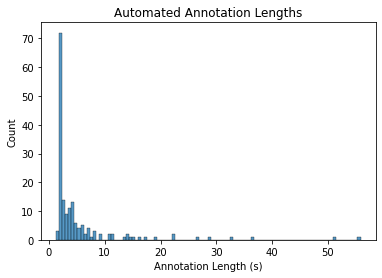

In [31]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

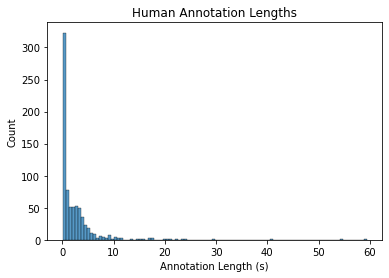

In [32]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [33]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./OFF0,20210810_202000.WAV,0,49.4567,0.1300,bird
1,./OFF0,20210811_080000.WAV,0,0.3191,4.6492,bird
2,./OFF0,20210811_181000.WAV,0,2.3400,0.5900,bird
3,./OFF0,20210811_181000.WAV,0,6.0000,0.4500,bird
4,./OFF0,20210812_073000.WAV,0,58.4300,1.5600,bird
...,...,...,...,...,...,...
755,./OFF0,20210823_092000.WAV,0,49.7109,5.1091,bird
756,./OFF0,20210824_034000.WAV,0,50.0408,4.8592,bird
757,./OFF0,20210824_170000.WAV,0,4.9283,2.3996,bird
758,./OFF0,20210824_170000.WAV,0,7.3279,3.8794,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


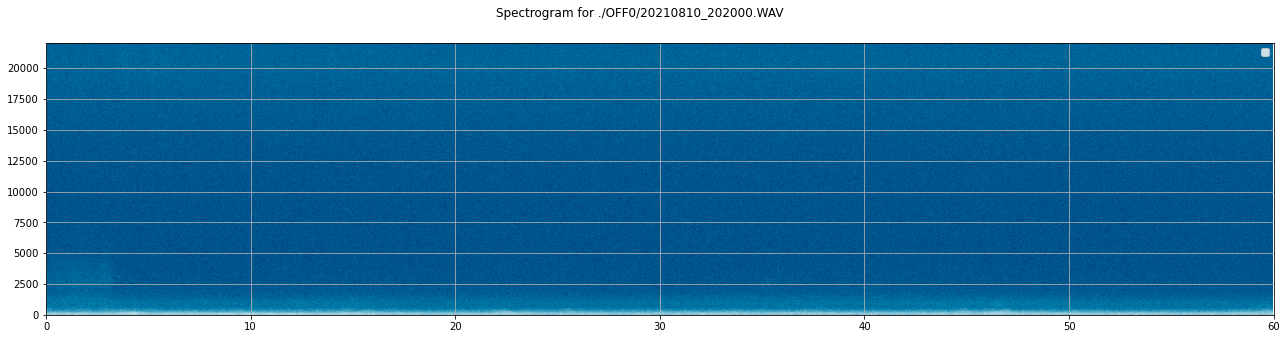

In [34]:
clip_path = "./OFF0/20210810_202000.WAV"
spectrogram_visualization(clip_path)

### Baseline graph with log scale

/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -718.9462  -1718.3232  -1488.8103  ...   375.84073   158.93867
   429.7321 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


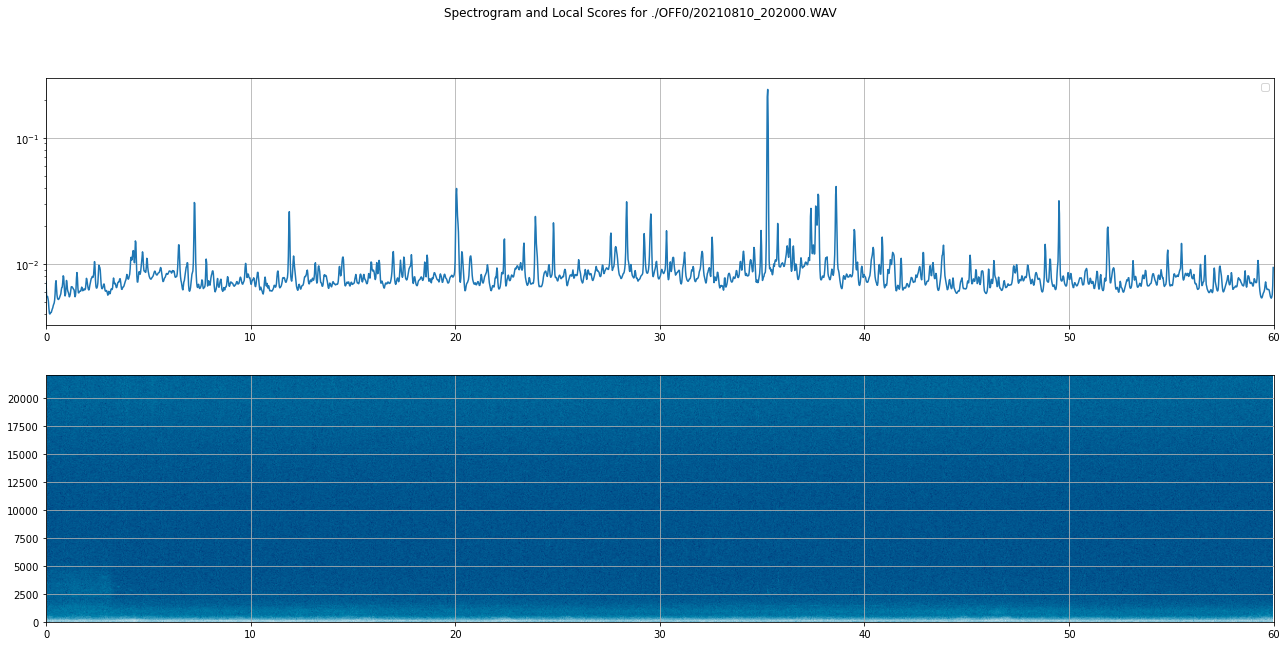

In [35]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -718.9462  -1718.3232  -1488.8103  ...   375.84073   158.93867
   429.7321 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


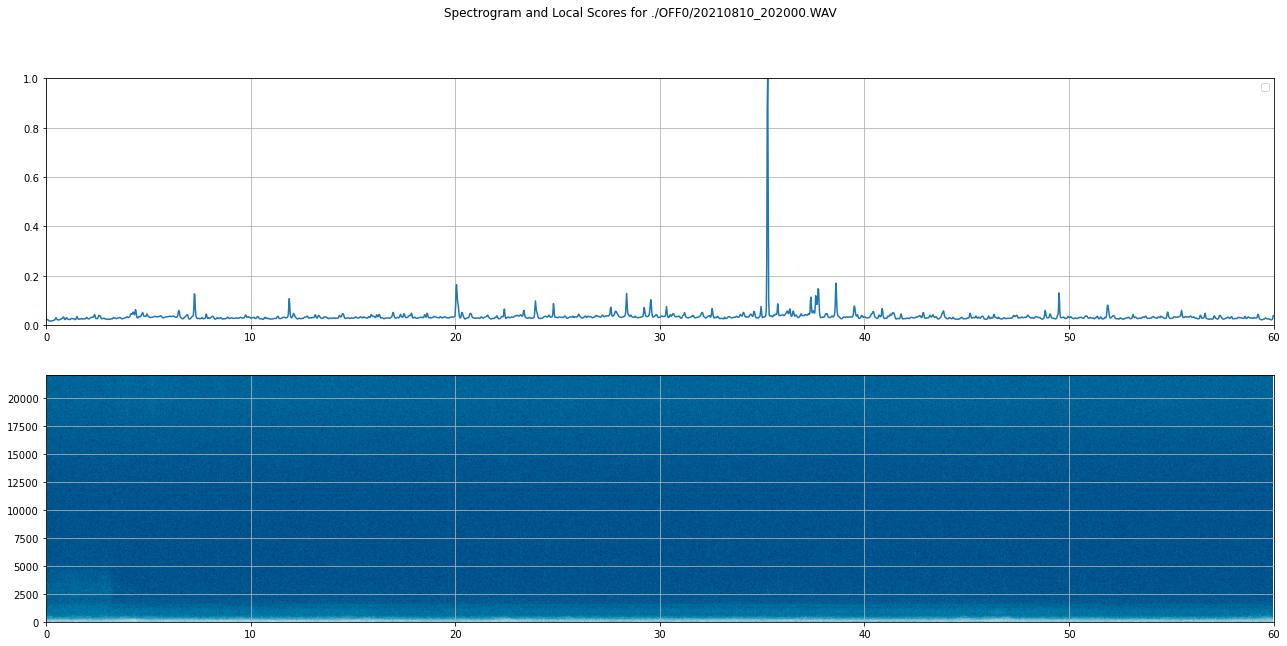

In [36]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, normalize_local_scores = True)

### Graph with Automated Labeling 

/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -718.9462  -1718.3232  -1488.8103  ...   375.84073   158.93867
   429.7321 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(


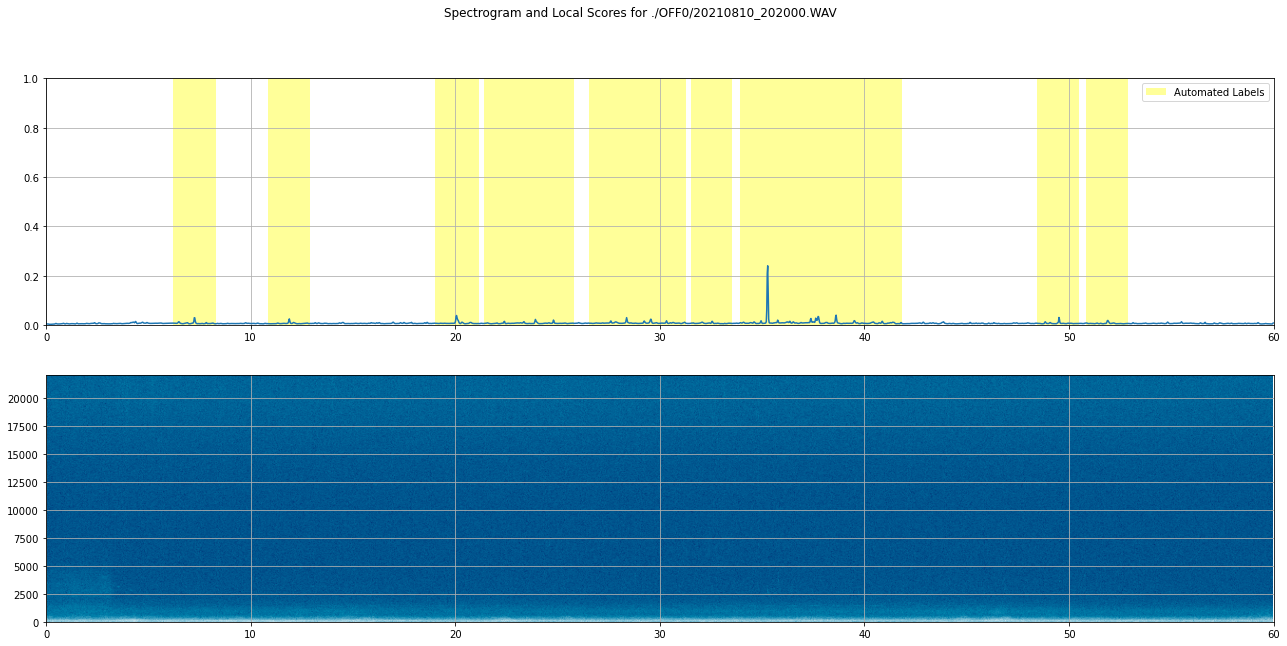

In [37]:
spectrogram_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters)

### Graph with Human Labelling

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


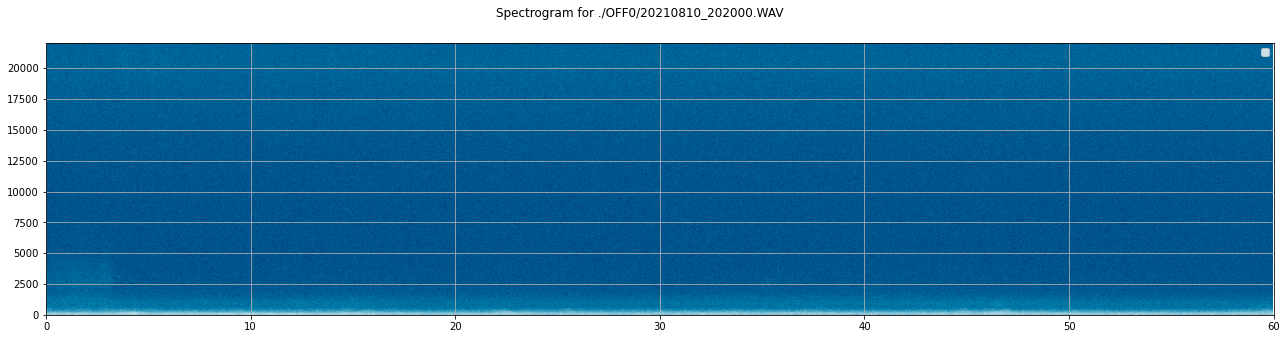

In [38]:
spectrogram_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "20210810_202000.wav.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -718.9462  -1718.3232  -1488.8103  ...   375.84073   158.93867
   429.7321 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(


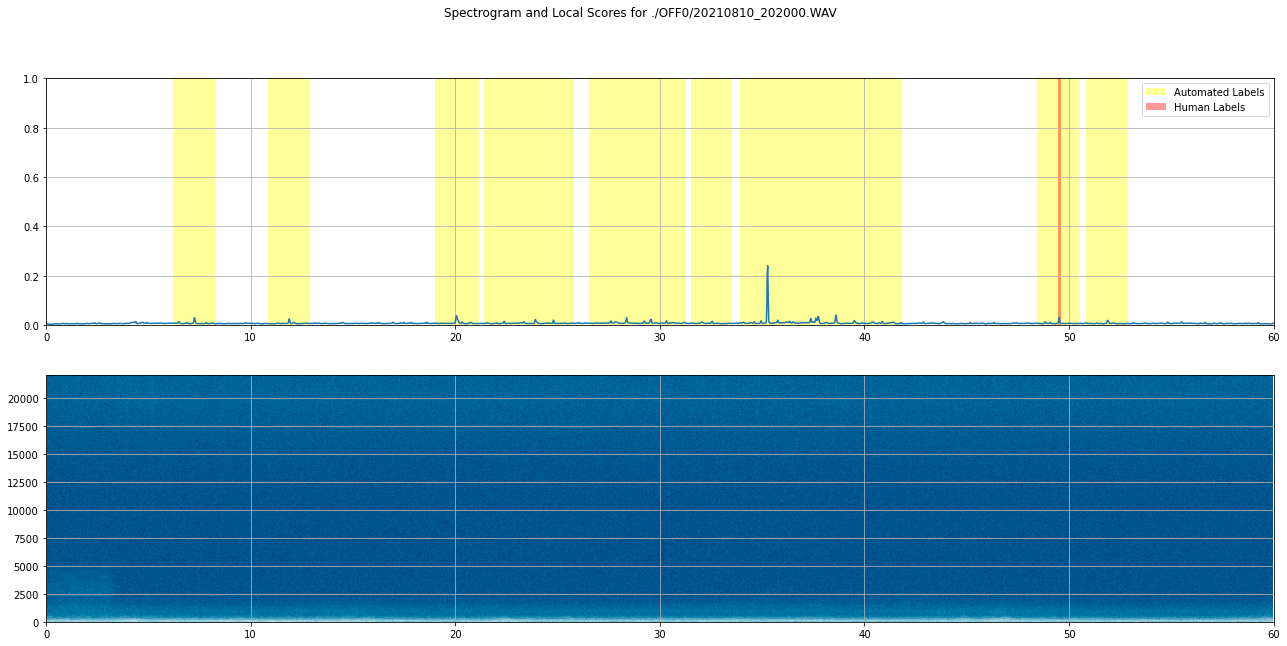

In [39]:
spectrogram_visualization(clip_path,automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "20210810_202000.WAV"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

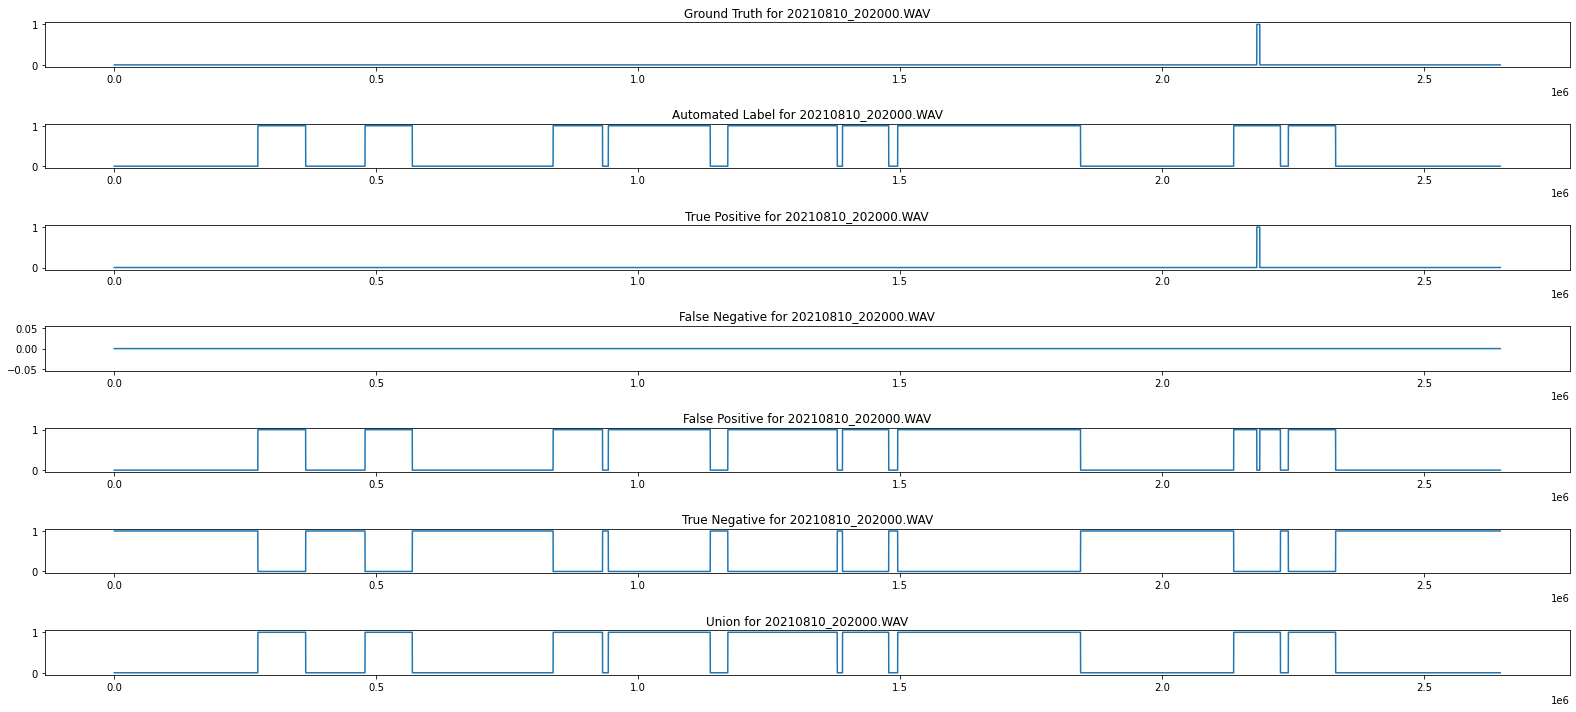

In [40]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "20210810_202000.WAV"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "20210810_202000.WAV"]
piha_stats = binary_visualization(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [41]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./OFF0/,20210821_211000.WAV,bird,1.563311,23.617029,0.000000,34.819660,25.180340,0.062085,1.000000,0.116911,0.062085
1,./OFF0/,20210817_103000.WAV,bird,1.713129,34.728707,0.396871,23.161293,36.838707,0.047010,0.811910,0.088874,0.046504
2,./OFF0/,20210821_112000.WAV,bird,0.590000,45.166327,0.000000,14.243673,45.756327,0.012894,1.000000,0.025460,0.012894
3,./OFF0/,20210818_023000.WAV,bird,0.790068,57.539184,0.009932,1.660816,58.339184,0.013545,0.987585,0.026723,0.013543
4,./OFF0/,20210823_043000.WAV,bird,0.000000,43.082517,0.580000,16.337483,43.662517,0.000000,0.000000,0.000000,0.000000
5,./OFF0/,20210818_220000.WAV,bird,5.289116,33.214762,0.000000,21.496122,38.503878,0.137366,1.000000,0.241551,0.137366
6,./OFF0/,20210811_080000.WAV,bird,4.134150,53.633333,0.515057,1.717460,58.282540,0.071565,0.889216,0.132469,0.070933
7,./OFF0/,20210810_202000.WAV,bird,0.130000,29.259864,0.000000,30.610136,29.389864,0.004423,1.000000,0.008808,0.004423
8,./OFF0/,20210821_122000.WAV,bird,0.580000,57.161769,0.000000,2.258231,57.741769,0.010045,1.000000,0.019890,0.010045
9,./OFF0/,20210819_090000.WAV,bird,1.270000,50.054422,0.000000,8.675578,51.324422,0.024745,1.000000,0.048294,0.024745


### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [42]:
global_dataset_statistics(statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.048753,0.893421,0.09246,0.048471


### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [43]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.     0.     0.     0.     0.     0.     0.     0.0643 0.    ]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [44]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

Division by zero setting precision, recall, and f1 to zero on 20210810_202000.WAV


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./OFF0/,20210810_202000.WAV,bird,0,1,9,0,0,0


### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [45]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Division by zero setting precision, recall, and f1 to zero on 20210821_211000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_112000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_023000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_043000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210810_202000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_122000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_090000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210819_192000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210818_062000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210824_160000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_151000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_230000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210820_012000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210822_173000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210817_143000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_181000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_033000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_050000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210816_005000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./OFF0/,20210821_211000.WAV,bird,0,1,5,0.0000,0.000,0.0000
1,./OFF0/,20210817_103000.WAV,bird,1,0,8,0.1111,1.000,0.2000
2,./OFF0/,20210821_112000.WAV,bird,0,1,5,0.0000,0.000,0.0000
3,./OFF0/,20210818_023000.WAV,bird,0,2,5,0.0000,0.000,0.0000
4,./OFF0/,20210823_043000.WAV,bird,0,1,13,0.0000,0.000,0.0000
5,./OFF0/,20210818_220000.WAV,bird,1,0,8,0.1111,1.000,0.2000
6,./OFF0/,20210811_080000.WAV,bird,1,0,3,0.2500,1.000,0.4000
7,./OFF0/,20210810_202000.WAV,bird,0,1,9,0.0000,0.000,0.0000
8,./OFF0/,20210821_122000.WAV,bird,0,1,4,0.0000,0.000,0.0000
9,./OFF0/,20210819_090000.WAV,bird,0,2,7,0.0000,0.000,0.0000


### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [46]:
global_stats_df = global_statistics(stats_df)
global_stats_df

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,N/A,5,38,164,0.0296,0.1163,0.0472
